In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [25]:
df_countryCode = pd.read_excel('Country-Code.xlsx')
df_countryCode.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [30]:
final_df = pd.merge(df,df_countryCode,on='Country Code',how='left')
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [31]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Missing values

In [13]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

#### Conclusion: -
- In Cuisines feature, we have 9 missing values
- Rest all the features are filled i.e. no missing values  

- With Cuisines as MCAR (missing completely at random)

In [22]:
df[df['Cuisines'].isnull()].head(4)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.1540,31.5772,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.1759,31.5882,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.1534,31.5751,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.9858,34.5318,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209


In [34]:
final_df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
UAE                 60
Brazil              60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [47]:
country_name = final_df['Country'].value_counts().index

In [48]:
country_vals = final_df['Country'].value_counts().values

([<matplotlib.patches.Wedge at 0x126a0297760>,
 [Text(-1.3711050098728035, -0.917916691155412, 'India'),
  Text(1.5845976896530545, 0.9547513613219949, 'United States'),
  Text(1.7709285932495957, 1.5447692117630412, 'United Kingdom'),
  Text(1.406740048706111, 1.350400842478384, 'UAE')],
 [Text(-0.7478754599306199, -0.5006818315393156, '93.8%'),
  Text(0.942193220874789, 0.5676899986238888, '4.7%'),
  Text(1.2057386166805757, 1.0517577612003683, '0.9%'),
  Text(0.8656861838191452, 0.8310159030636207, '0.7%')])

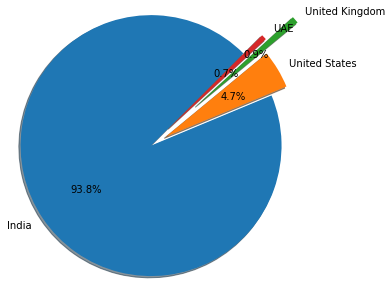

In [78]:
plt.pie(x=country_vals[:4],labels=country_name[:4],autopct="%0.1f%%",explode=[0,0.2,0.7,0.3],shadow=True,radius=1.5,startangle=45)

**Conclusion :** Zomato has maximum transaction are from India with 93.8% and then United States with 4.7% & United Kingdom with 0.9% respectively   

In [79]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [85]:
df_rating = final_df.groupby(['Aggregate rating','Rating text','Rating color']).size().reset_index().rename(columns={0:'Rating Count'})

In [92]:
df_rating.head()

,Aggregate rating,Rating text,Rating color,Rating Count
0,0.0,Not rated,White,2148
1,1.8,Poor,Red,1
2,1.9,Poor,Red,2
3,2.0,Poor,Red,7
4,2.1,Poor,Red,15


In [121]:
rating_color = df_rating['Rating color'].unique()
rating_colors = list(rating_color)
rating_color = [rating_color.lower() for rating_color in rating_colors]
rating_color = [rating_color.replace(' ','') for rating_color in rating_color]

#### Conclusion: -

- When rating is between 4.5 to 4.9 --> Excellent
- When rating is between 4.0 to 4.4 --> Very Good
- When rating is between 3.5 to 3.9 --> Good
- When rating is between 2.5 to 3.4 --> Average
- When rating is between 1.8 to 2.4 --> Poor
- When rating is between 0.0 --> No Rating

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

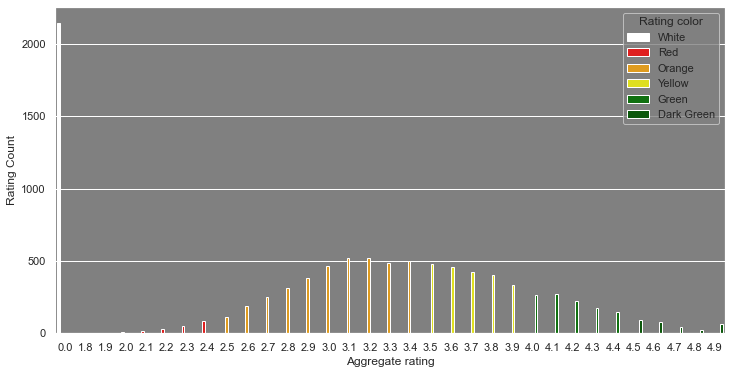

In [135]:
# plt.rcParams['figure.figsize'] = (12,6)
plt.figure(figsize=(12, 6))
sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'white'})
sns.barplot(data = df_rating,x='Aggregate rating',y='Rating Count' ,hue="Rating color",palette=rating_color)

**Observations**

1. Not Rating count is high
2. Maximum number of rating is between 2.8 to 3.6

### Countries that has given 0 ratings

In [173]:
final_df[final_df['Aggregate rating']==0.0].groupby(['Country']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})

,Country,Count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


#### Observations: 

1. Maximum no-ratings are from country India with count 2139

### Which currency is used by which country

In [174]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [179]:
currency_country = final_df.groupby(['Currency','Country'])

In [196]:
currency_country.size().reset_index().drop([0],axis=1)

,Currency,Country
0,Botswana Pula(P),Phillipines
1,Brazilian Real(R$),Brazil
2,Dollar($),Australia
3,Dollar($),Canada
4,Dollar($),Singapore
5,Dollar($),United States
6,Emirati Diram(AED),UAE
7,Indian Rupees(Rs.),India
8,Indonesian Rupiah(IDR),Indonesia
9,NewZealand($),New Zealand


### Which Country do have online deliveries options

In [198]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [202]:
final_df[['Has Online delivery','Country']]

,Has Online delivery,Country
0,No,Phillipines
1,No,Phillipines
2,No,Phillipines
3,No,Phillipines
4,No,Phillipines
...,...,...
9546,No,Turkey
9547,No,Turkey
9548,No,Turkey
9549,No,Turkey


In [210]:
final_df[final_df['Has Online delivery']=='Yes'].groupby(['Country']).size().reset_index().rename(columns={0:'Count'})

,Country,Count
0,India,2423
1,UAE,28


### A pie chart for cities distribution

In [215]:
final_df['City'].value_counts()

New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
                   ... 
Tanunda               1
Middleton Beach       1
Lorn                  1
Inverloch             1
Paynesville           1
Name: City, Length: 141, dtype: int64

In [217]:
city = final_df['City'].value_counts().index

In [218]:
city_value = final_df['City'].value_counts().values

([<matplotlib.patches.Wedge at 0x126a923f040>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.699916978190491, -0.016800811281318974, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(1.1999413963697583, -0.011859396198578098, '0.31%')])

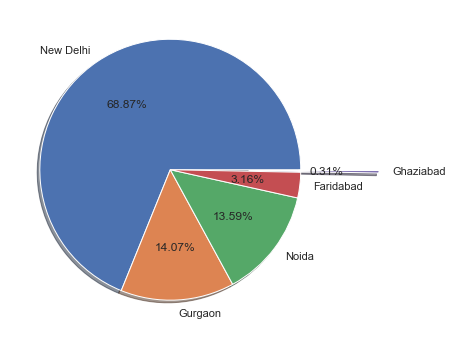

In [226]:
plt.pie(x = city_value[:5],labels=city[:5],explode=[0,0,0,0,0.6],shadow=True,autopct="%0.2f%%")

In [229]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [254]:
df['Cuisines'].mode()[0]

'North Indian'

In [255]:
final_df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [256]:
final_df['Cuisines'].isnull().mean()

0.0

### Top Cuisines

In [258]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [285]:
cuisines = final_df[final_df['Aggregate rating']==4.9].groupby(['Cuisines']).size().sort_values(ascending=False).reset_index().drop(columns=[0])

In [286]:
cuisines[:10]

,Cuisines
0,"Sunda, Indonesian"
1,Desserts
2,"European, Mediterranean, North Indian"
3,"Brazilian, Bar Food"
4,Modern Indian
5,"North Indian, European, Mediterranean"
6,Indian
7,"North Indian, Chinese"
8,North Indian
9,"American, BBQ, Sandwich"


**Observation**:
1. Highest Rated Cuisine served is Sunda which is an Indonesian Dish